# Final project

**Can you escape a velociraptor?**

Your goal is to figure out whether or not a velociraptor will catch you or if you can outrun it!

## Problem 1. Position vs. time

Suppose a velociraptor can run 18 m/s. And suppose you can run at 3 m/s, but you have a 30 meter head start. Assume that you and the 'raptor accelerate so quickly that you can ignore acceleration. 

Make a plot of the position vs. time for both you and the 'raptor (plot both on the same figure). Clearly label all axes and give the plot a legend. Plot over a suitable time frame. Save the figure as a .png file. 

*This plot will be included in your write-up*.

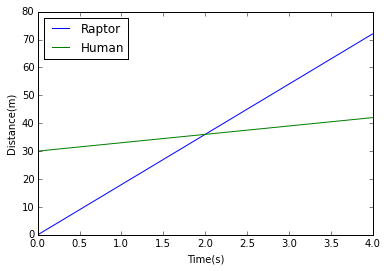

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array(range(0,5))
yr = x*18
yh = x*3 + 30

plt.plot(x,yr,label="Raptor")
plt.plot(x,yh,label="Human")

plt.xlabel("Time(s)")
plt.ylabel("Distance(m)")
plt.legend(loc="upper left")

#plt.savefig('graph1.png')

## Problem 2. When does the 'raptor catch up to you?

Use your code to figure out when the raptor catches up to you. Both how much time has passed and how far *you* have run.  

Do not just get this information off the graph. Use your Python code to figure this out! Getting the information just by looking at the plot will result in a 0 for this question. You can use an analytic approach (algebra) to check your answer, but that is not the approach I want you to use. Depending on how you write your code, you might not get an *exact* answer, but you should find a way to get pretty close to the algebraic solution. 

In [3]:
def when(arg1,arg2,r):
    for i in r:
        if arg1[i] == arg2[i]:
            return r[i],yh[i]

print "It takes it %i seconds to catch you after travelling %i meters." % (when(yr,yh,x)[0],when(yr,yh,x)[1])

It takes it 2 seconds to catch you after travelling 36 meters.


## Problem 3. When is it close enough to strike?

It turns out the 'raptor will start trying to attack when it is 1 meter away. How much time has passed and how far have you run when it is 1 meter behind you? Use a similar approach as the last problem. 

***Also make a new copy of the above plot, but label (with a line or arrow or whatever you want) the point at which the raptor is 1 meter behind you.***

1.94 seconds
5.83 meters


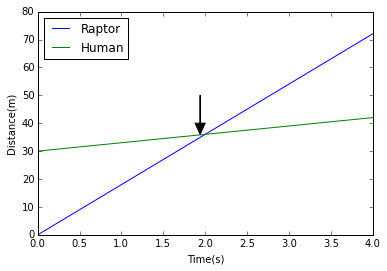

In [4]:
def t_to_strike(function,v):
    d = function - 1
    t = d/float(v)
    return t
time = t_to_strike(when(yr,yh,x)[1].astype(float), 18)
print "%.2f seconds" % time
print "%.2f meters" % (time*3)

plt.plot(x,yr,label="Raptor")
plt.plot(x,yh,label="Human")

plt.xlabel("Time(s)")
plt.ylabel("Distance(m)")
plt.legend(loc="upper left")
plt.arrow(1.94, 50, 0.0, -10.0, head_width=0.12, head_length=4, fc='k', ec='k')

## Problem 4. Will it bite you?

When the 'raptor is 1 meter away, it will try to bite you. If it doesn't bite you, it will try a second and (if necessary) a third time. If it doesn't get you on the third try, it will grow frustrated and stop chasing you. Hurray!

Suppose the first time it tries, there is a 20% chance it will bite you. If it misses and it needs to try a second time, there is only a 15% chance, and if it misses *that* time, there is only a 7% chance on the third try. 

If it bites you once, you're 'raptor food. If it misses all three times, you get away!

What is the probability that you will get away?


In [5]:
# Your code here
def escape():
    
    bite1 = np.random.randint(100)
    bite2 = np.random.randint(100)
    bite3 = np.random.randint(100)
    
    if bite1 <= 20:
        return "f"
    elif bite2 <= 15:
        return "f"
    elif bite3 <= 7:
        return "f"
    else:
        return "s"

In [6]:
failures = 0
successes = 0

for i in range(0,10000):
    i+=1
    t = escape()
    
    if t == "f":
        failures += 1
    elif t == "s":
        successes += 1
        
print failures,successes

escapechance = (successes/float(10000))*100
print round(escapechance),"%"

3992 6008
60.0 %
